In [1]:
import pandas as pd
import numpy as np
import re
import texthero as hero
import nltk
import matplotlib.pyplot as plt
from datetime import datetime
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer
import datetime

In [2]:
df = pd.read_csv('data_with_content_below4_negative.csv')
df.head()

,review_id,time,seller_name,product_name,product_variation,review_content,customer_name_full,customer_name_anonymous,review_stars,Bad Delivery,Product,Customer Service
0,2,2021-02-17 00:28:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,"Ordered on 6th, rec'd parcel on 10 Feb at 11.3...",NaN,w*****4,3,1.0,NaN,1.0
1,12,2021-02-08 21:23:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Fast delivery. Box dented. Quality is thin. I ...,NaN,n*****4,3,1.0,1.0,NaN
2,13,2021-02-12 11:39:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Second purchase the mask.. so disappointed not...,NaN,s*****l,2,NaN,1.0,NaN
3,14,2021-02-16 16:38:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult White,Received within a few days. However it is not ...,NaN,h*****i,3,NaN,1.0,NaN
4,23,2021-01-09 17:46:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Took 3 days to arrived. Unresponsive and rejec...,NaN,i*****9,3,NaN,1.0,1.0


In [3]:
df.drop(['review_id','customer_name_full', 'customer_name_anonymous'],axis=1,inplace=True)
df.fillna(0,inplace=True)
df['length'] = df['review_content'].apply(lambda x: len(x))
df.rename(columns={'Bad Delivery': 'Delivery', 'Customer Service': 'Service'},inplace=True)
df[['Delivery','Product','Service']]=df[['Delivery','Product','Service']].astype('int64')
df.head()

,time,seller_name,product_name,product_variation,review_content,review_stars,Delivery,Product,Service,length
0,2021-02-17 00:28:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,"Ordered on 6th, rec'd parcel on 10 Feb at 11.3...",3,1,0,1,296
1,2021-02-08 21:23:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Fast delivery. Box dented. Quality is thin. I ...,3,1,1,0,79
2,2021-02-12 11:39:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Second purchase the mask.. so disappointed not...,2,0,1,0,79
3,2021-02-16 16:38:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult White,Received within a few days. However it is not ...,3,0,1,0,185
4,2021-01-09 17:46:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Took 3 days to arrived. Unresponsive and rejec...,3,0,1,1,153


In [4]:
df.to_csv('review_for_tableau.csv')

In [5]:
df['clean_review'] = hero.clean(df['review_content']).apply(lambda x: re.sub("[^a-zA-Z]", " ",x))
df.head()

,time,seller_name,product_name,product_variation,review_content,review_stars,Delivery,Product,Service,length,clean_review
0,2021-02-17 00:28:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,"Ordered on 6th, rec'd parcel on 10 Feb at 11.3...",3,1,0,1,296,ordered th rec parcel feb pm bot boxes box ...
1,2021-02-08 21:23:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Fast delivery. Box dented. Quality is thin. I ...,3,1,1,0,79,fast delivery box dented quality thin tried we...
2,2021-02-12 11:39:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Second purchase the mask.. so disappointed not...,2,0,1,0,79,second purchase mask disappointed first order
3,2021-02-16 16:38:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult White,Received within a few days. However it is not ...,3,0,1,0,185,received within days however ply described rea...
4,2021-01-09 17:46:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Took 3 days to arrived. Unresponsive and rejec...,3,0,1,1,153,took days arrived unresponsive rejected cancel...


In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

pos_stopwords = {'acceptable', 'comfortable', 'fast', 'fast delivery', 'fine', 'good', 'great', 'happy', 'like', 'love', 'luckily', 'nice', 'nicely', 'ok', 'okay', 
                 'pretty', 'recommend', 'recommended', 'thank', 'thanks', 'well','delivery','quality','box','black'} 

neu_stopwords = {'abit', 'actually', 'already', 'although', 'also', 'better', 'bit', 'boxes', 'bought', 'buy', 'came', 'come', 'compared', 'condition', 'day', 'delivered', 'due', 'enough', 'expected', 'even', 'face', 
                 'feel', 'feels', 'find', 'first', 'fit', 'get', 'give', 'given', 'got', 'inside', 'instead', 'it', 'item', 'items', 'hope', 'know',
                 'look', 'looks', 'mask', 'masks', 'may', 'me', 'much', 'n', 'nan', 'need', 'next', 'one', 'order', 'ordered', 'overall', 'pc', 'please', 'ply',
                 'purchase', 'purchased', 'put', 'quite', 'really', 'review', 'received', 's', 'see', 'seem', 'seems', 'seller', 'side', 'slightly', 'star', 'stars', 'still', 'super','sure', 'there', 'though', 
                 'took', 'tried', 'try', 'u', 'use', 'using', 'way', 'will', 'within', 'would', 'yet'}

for word in pos_stopwords:
    stopwords = STOPWORDS.add(word)
    
for word in neu_stopwords:
    stopwords = STOPWORDS.add(word)

In [8]:
df.columns

Index(['time', 'seller_name', 'product_name', 'product_variation',
       'review_content', 'review_stars', 'Delivery', 'Product', 'Service',
       'length', 'clean_review'],
      dtype='object')

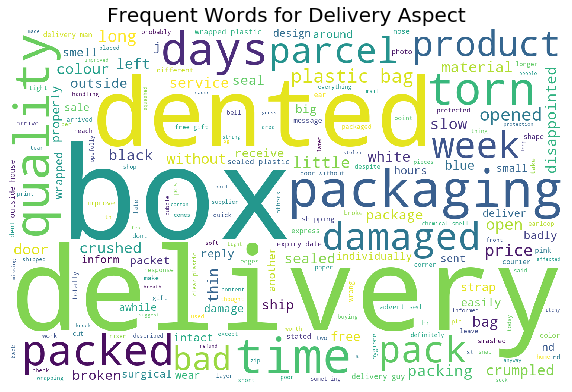

In [10]:
true_comments = df[df['Delivery']==1].clean_review.values
wc = WordCloud(background_color="white", width=1500,              
    height=960,              
    margin=10,
               #max_words=30, 
               stopwords=stopwords)
wc.generate(" ".join(true_comments))

plt.figure(figsize=(10,8))
plt.axis("off")
plt.title("Frequent Words for {} Aspect".format('Delivery'), fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

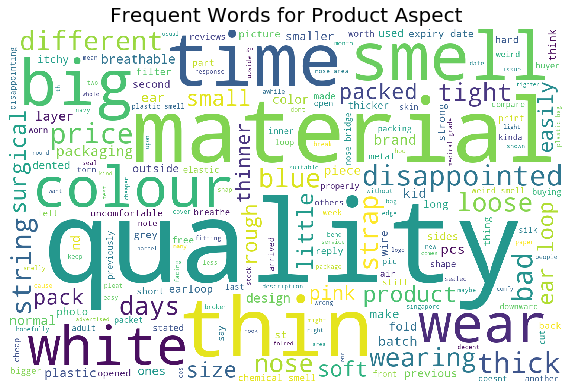

In [12]:
true_comments = df[df['Product']==1].clean_review.values
wc = WordCloud(background_color="white", width=1500,              
    height=960,              
    margin=10,
               #max_words=30, 
               stopwords=stopwords)
wc.generate(" ".join(true_comments))

plt.figure(figsize=(10,8))
plt.axis("off")
plt.title("Frequent Words for {} Aspect".format('Product'), fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

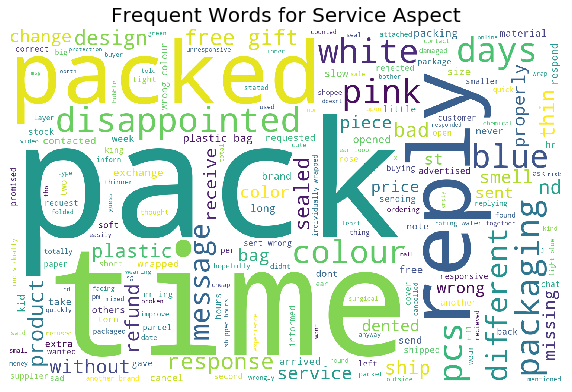

In [14]:
true_comments = df[df['Service']==1].clean_review.values
wc = WordCloud(background_color="white", width=1500,              
    height=960,              
    margin=10,
               #max_words=30, 
               stopwords=stopwords)
wc.generate(" ".join(true_comments))

plt.figure(figsize=(10,8))
plt.axis("off")
plt.title("Frequent Words for {} Aspect".format('Service'), fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()